# Продвинутый Python, Семинар 2

**Лектор:** Садуллаев Музаффар

**Семинаристы:** Бобоев Мурод, Богданов Сергей, Васина Олеся, Дергачев Cтепан, Какурин Василий, Садуллаев Музаффар, Солодовников Михаил

**In our heart**: Петров Тимур

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Машина дня: **Сhevrolet Belt Air Sport 1957**

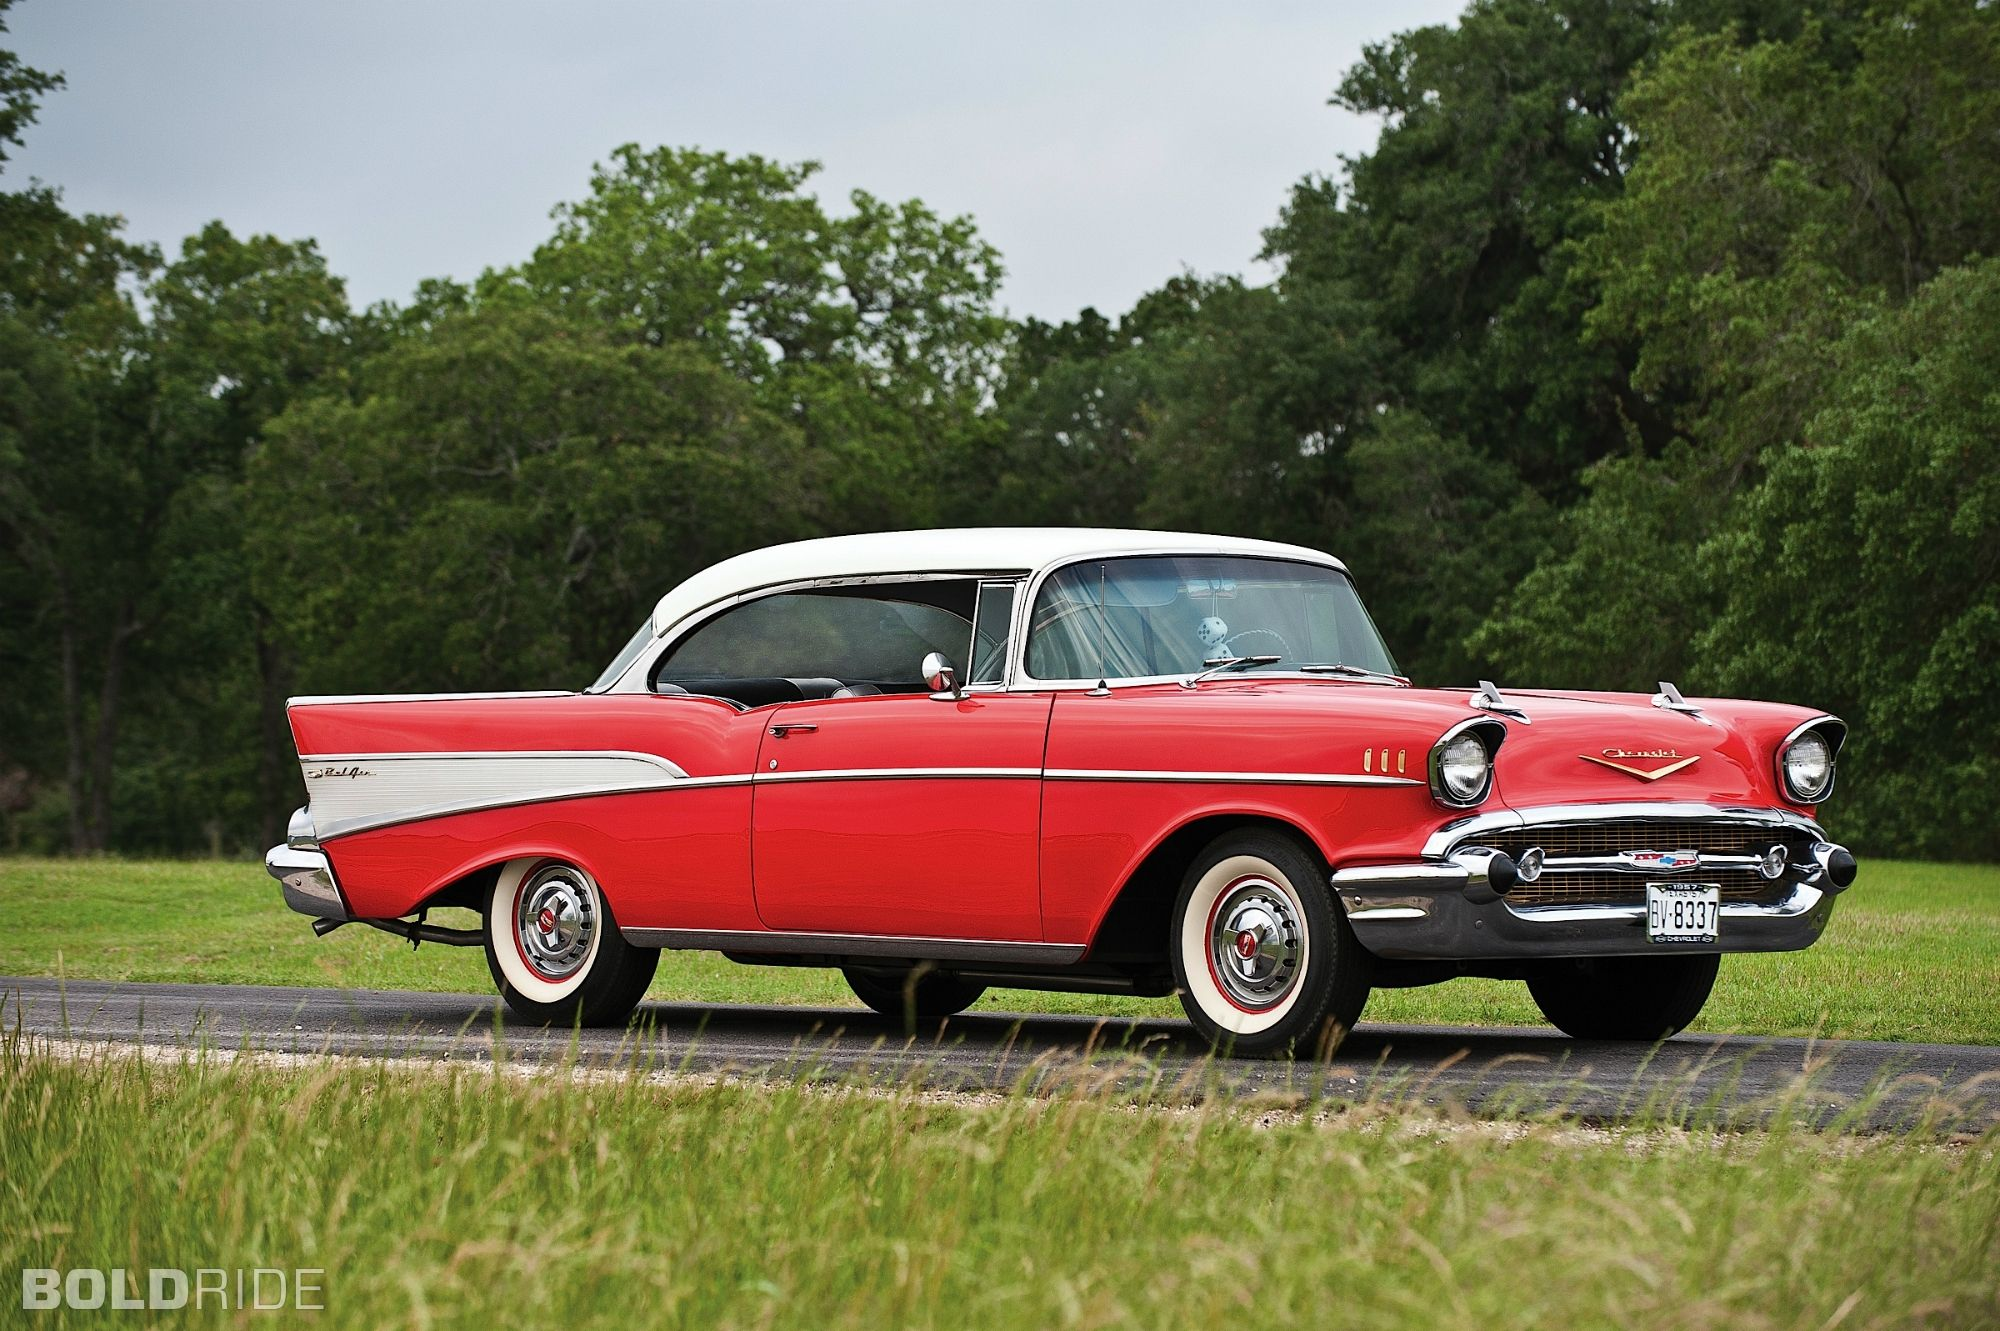

# Немного поупражняемся :-)

Реализуйте систему для управления контактами.

Представьте, что вы сотовый оператор. Вам требуется создать базу данных абонентов. Давайте декомпозируем задачу

Задача 1.1.

Ваша задача — создать базовый класс `Abonent`, который содержит общие методы для всех типов контактов.

У него будут четыре аттрибута:

1. Имя (Сюда записываем ФИО)

2. Номер телефона

3. Тип абонента

4. Стоимость тарифа = 100 у.e.



Задача 1.2.

У нас в линейке тарифов есть обычные, льготные и коммерческие тарифы.
Давайте мы реализуем три класса, которые будут наследоваться от базового класса.

После этого вам нужно реализовать, которые будут наследоваться от базового класса:

1. `UsualAbonent` – 1.0

2. `StudentAbonent` – 0.5

3. `CommercialAbonent` – 5.0

Дополнительно у каждого типа абонента есть коэффициент стоимости в зависимости от типа абонента.

Вам надо будет поменять стоимость тарифа при инициализации дочернего класса.


Задача 1.3.

Генератор номеров, который будет иметь один базовый аттрибут – БД с номерами, а также два метода:


1. Генерация случайного номера

2. Создание контакта (здесь также требуется в зависимости от типа тарифа менять цену)

In [54]:
import random

In [7]:
### Your code

class Abonent:
    def __init__(self, name: str, phone_number: int, price: float=100) -> None:
        pass

    def show_number(self) -> None:
        pass

    def add_to_group(self, group_name: str) -> None:
        pass


class UsualAbonent(Abonent):
    def __init__(self, name: str, phone_number: int, price: float) -> None:
        pass

class StudentContact(Abonent):
    def __init__(self, name: str, phone_number: int, price: float) -> None:
        pass

class CommercialAbonent(Abonent):
    def __init__(self, name: str, phone_number: int, price: float) -> None:
        pass


class AbonentGenerator:
    def __init__(self) -> None:
        self.existing_numbers = []
        self.price = 100

    def generate_unique_phone_number(self) -> str:
        pass


    def create_contact(self, name: str, contact_type: str) -> object:
        pass


generator = AbonentGenerator()

contact1 = generator.create_contact("Alice", 'usual')
contact2 = generator.create_contact("Sasha", 'student')

# Using the methods
contact1.show_number()
contact1.add_to_group("student")


contact3 = generator.create_contact("Jenya", 'commercial')
contact3.show_number()

print(contact3.price)

AttributeError: 'NoneType' object has no attribute 'show_number'

# Builder, Factory, Adapter

### Factory

Когда нужно создавать объекты с разной логикой, но с одним интерфейсом

In [1]:
from abc import ABC, abstractmethod

class Transport(ABC):
    @abstractmethod
    def deliver(self): ...

class Truck(Transport):
    def deliver(self):
        return "Доставка грузовиком"

class Ship(Transport):
    def deliver(self):
        return "Доставка кораблём"


def transport_factory(kind: str) -> Transport:
    match kind:
        case "truck":
            return Truck()
        case "ship":
            return Ship()

    raise ValueError("Неизвестный транспорт")

t = transport_factory("ship")
print(t.deliver())


Доставка кораблём


### Adapter

Когда нужно подружить несовместимые интерфейсы.

**Ситуация** У нас есть старый интерфейс логгера, который весь код вызывает через `.log(message)`

Мы не можем переписать весь старый код => нужен адаптер.

In [ ]:
class OldLogger:
    def log(self, msg: str):
        print("OLD:", msg)


class NewLogger:
    def write(self, text: str):
        print("NEW:", text)


Как мы видим, что как ранее `log(message)` вызывался так и будет вызываться. Но, через адаптер.

### Builder

**Ситуация** Xотим собирать сообщение для пользователя. У него может быть:

* заголовок
* текст
* подпись

Иногда нужны все эти куски, а может и не нужно)

In [2]:
class Message:
    def __init__(self, title="", text="", footer=""):
        self.title = title
        self.text = text
        self.footer = footer

    def __str__(self):
        parts = []
        if self.title: parts.append(f"=== {self.title} ===")
        if self.text: parts.append(self.text)
        if self.footer: parts.append(f"-- {self.footer}")
        return "\n".join(parts)


In [3]:
class MessageBuilder:
    def __init__(self):
        self._title = ""
        self._text = ""
        self._footer = ""

    def title(self, title):
        self._title = title
        return self

    def text(self, text):
        self._text = text
        return self

    def footer(self, footer):
        self._footer = footer
        return self

    def build(self):
        return Message(self._title, self._text, self._footer)


In [4]:
msg = (
    MessageBuilder()
    .title("Важное уведомление")
    .text("Вы не заполнили СОП")
    .footer("Без уважения")
    .build()
)

print(msg)


=== Важное уведомление ===
Вы не заполнили СОП
-- Без уважения


# Вспомним множественное наследование из лекции

В ООП наследование позволяет создавать **новый класс** на основе существующего, унаследовав его атрибуты и методы.

In [6]:
class Animal:
    def speak(self):
        print("Some generic sound")

class Dog(Animal):
    def speak(self):
        print("Woof!")

In [7]:
dog = Dog()
dog.speak()  # => Woof!

Woof!


Обычно используется одиночное наследование (наследование от одного класса), но возможна более сложная конструкция — множественное наследование.

In [9]:
class Swimmable:
    def swim(self):
        print("I can swim!")

class Flyable:
    def fly(self):
        print("I can fly!")

class Duck(Swimmable, Flyable):
    pass

In [10]:
d = Duck()
d.swim()  # → I can swim!
d.fly()   # → I can fly!

I can swim!
I can fly!


А есть подводные? Вспомним?

### Проблема ромба

In [14]:
class A:
    def action(self):
        print("A.action")

class B(A):
    def action(self):
        print("B.action")

class C(A):
    def action(self):
        print("C.action")

class D(B, C):
    pass

d = D()
d.action()

B.action


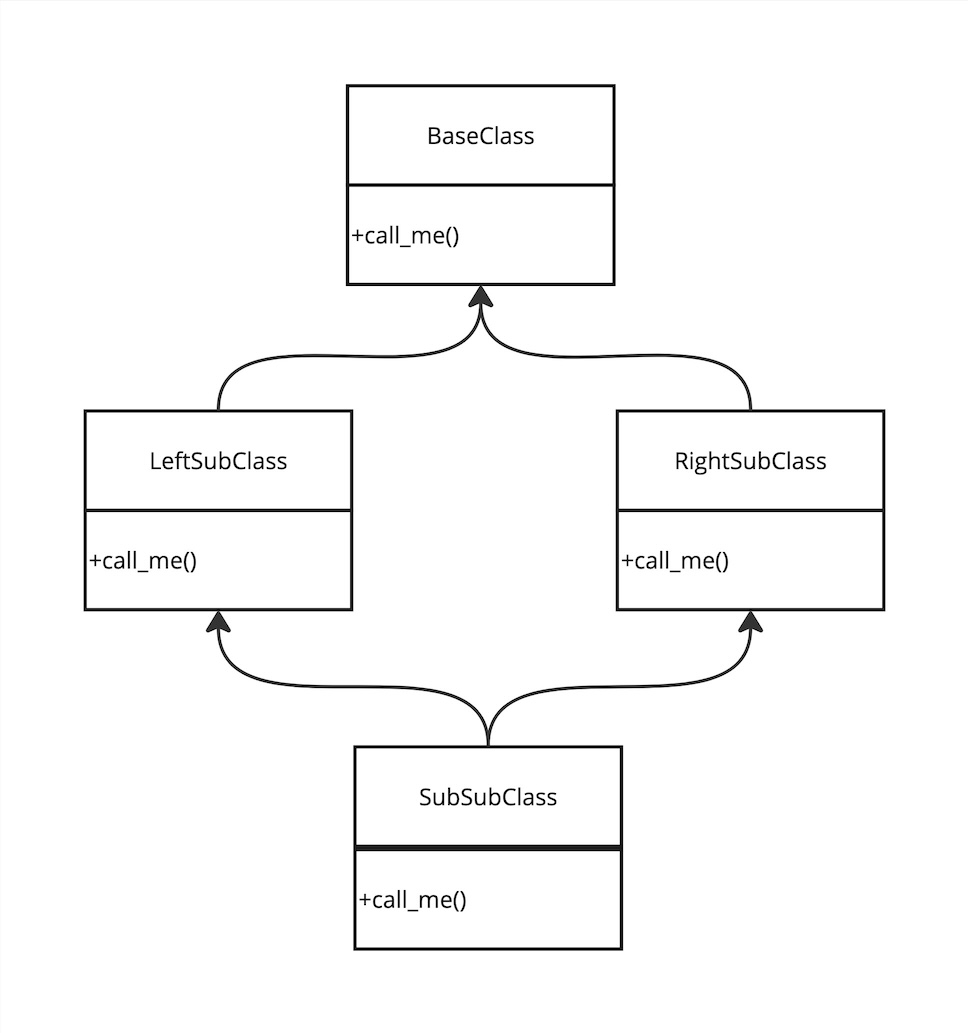

In [43]:
class BaseClass:
    num_base_calls = 0
    def call_me(self) -> None:
        print("Calling method on BaseClass" )
        self.num_base_calls += 1


class LeftSubClass(BaseClass):
    num_left_calls = 0
    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on LeftSubClass")
        self.num_left_calls += 1


class RightSubClass(BaseClass):
    num_right_calls = 0
    def call_me(self) -> None:
        BaseClass.call_me(self)
        print("Calling method on RightSubClass")
        self.num_right_calls += 1


class Subclass(LeftSubClass, RightSubClass):
    num_sub_calls = 0
    def call_me(self) -> None:
        LeftSubClass.call_me(self)
        RightSubClass.call_me(self)
        print("Calling method on Subclass")
        self.num_sub_calls += 1

In [44]:
s = Subclass()

s.call_me()

print(f" s.num_sub_calls: {s.num_sub_calls} \n",
      f"s.num_left_calls: {s.num_left_calls} \n",
      f"s.num_right_calls: {s.num_right_calls} \n",
      f"s.num_base_calls: {s.num_base_calls} \n")

Calling method on BaseClass
Calling method on LeftSubClass
Calling method on BaseClass
Calling method on RightSubClass
Calling method on Subclass
 s.num_sub_calls: 1 
 s.num_left_calls: 1 
 s.num_right_calls: 1 
 s.num_base_calls: 2 



А как понять, что оно должно вывести?

### method resolution order

Давайте посмотрим как он будет ее искать:

TLDR: А у меня есть предки? Ага! Они есть. Попробую посмотреть, есть ли такая реализация в предках? Да! Есть. Запомним но не пойдем. 

Тогда:
* Сначало посмотрит сам у себя -- нет ли метода в самом классе **D** в котором мы вызывали
* Потом будет смотреть у родителей -- "слева-направо" ===> **D(B,C)** идет в B, потом С
* А у **B** тоже есть родитель и это **A**, туда тоже пойдем
* И у **C** тоже есть родитель и это **C**, получается он идет второй раз => получается если метод одинаков мы его скипнем
* В конце добавляется **object** -- общий прародитель всего питона. 

```    
    
    A
   / \
  B   C
   \ /
    D
```

Для того чтобы понять, что же все же придет -- есть метод, который который может построить граф зависимостей от этих классов. Называется он `mro()`или если его перевести на русский -- решение кто будет первым.

In [15]:
print(D.mro())

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


Поэтому `d.action()` вызовет метод из B, потому что он раньше в порядке разрешения. А как это устроено в реализации CPython?

### c3 линеаризация

Алгоритм, который используется для разрешения таких проблем - то есть и есть та самая реализация **mro()**
Что он из себя представляет?

Всего 3 правила:
* Если в объявлении **class D(B, C)** B указан раньше C, то в MRO B идёт раньше C.
* Расширение иерархии не ломает уже установленные отношения порядка в поддеревьях.
* Каждый класс встречается в MRO ровно один раз, и общие предки (например, A в ромбе) не дублируются.

### А если формально?

class C(B1, B2, ..., Bn) - предположим есть у нас такой класс.
Тогда:
```
L[C] = [C] + merge( L[B1], L[B2], ..., L[Bn], [B1, B2, ..., Bn] )
```
L[X] — MRO для класса X
merge — это специальная процедура слияния списков

Алгоритм работы **merge**:
* Возьмет первую голову среди списков (первый элемент в одном из списков), которая не встречается в «хвостах» ни одного из остальных списков
* Добавит её в ответ и удалит из всех списков
* Если такой головы нет — иерархия противоречива => итерпретатор бросит **TypeError**: Cannot create a consistent method resolution order (MRO)

```
class A: ...
class B(A): ...
class C(A): ...
class D(B, C): ...
```

```
L[A] = [A, object]
L[B] = [B] + merge(L[A], [A]) = [B, A, object]
L[C] = [C, A, object]
L[D] = [D] + merge(L[B], L[C], [B, C])
```

А в чем же проблема тогда?

In [20]:
class O: pass

class X(O): pass
class Y(O): pass

# A хочет: X раньше Y
class A(X, Y): pass

# B хочет: Y раньше X
class B(Y, X): pass

In [22]:
try:
    class M(A, B): pass
except Exception as e:
    print(e)

Cannot create a consistent method resolution order (MRO) for bases X, Y


In [13]:
class A:
    def a():
        pass

class F:
    def a():
        pass

class B(A, F):
    def a():
        pass

class C(A, F):
    def a():
        pass

class D(B, C):
    def a():
        pass


D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, __main__.F, object]

Базовые цепочки вызовов:
- `B(A, F)` → `[B, A, F, object]`
- `C(F, A)` → `[C, F, A, object]`

Теперь строим MRO для `D(B, C)`:

1. Начинаем с `D` → результат: `[D]`. Родители: `[B, C]`.
2. MRO(`B`) = `[B, A, F, object]`.
3. MRO(`C`) = `[C, F, A, object]`.

4. Кандидаты: `B`, `B`, `C`.  
   Берём `B`.  
   Ответ: `[D, B]`.

5. Убираем `B`. Теперь списки: `[C]`, `[A, F, object]`, `[C, F, A, object]`.

6. Кандидаты: `C`, `A`, `C`.  
   `A` нельзя взять (он стоит после `F` в третьем списке).  
   Берём `C`.  
   Ответ: `[D, B, C]`.

7. Убираем `C`. Теперь: `[]`, `[A, F, object]`, `[F, A, object]`.

8. Кандидаты: `A`, `F`.  
   `A` снова заблокирован (стоит после `F`).  
   Берём `F`.  
   Ответ: `[D, B, C, F]`.

9. Убираем `F`. Теперь: `[A, object]`, `[A, object]`.

10. Кандидаты: `A`, `A`.  
    Берём `A`.  
    Ответ: `[D, B, C, F, A]`.

11. Убираем `A`. Теперь: `[object]`, `[object]`.

12. Остался только `object`.  
    Добавляем  
    Ответ: `[D, B, C, F, A, object]`.


Ответ:
```
[D, B, C, F, A, object]
```


### super


* Позволяет "проехаться" по зависимостям (MRO) ровно один раз
* Не лечит "неправильные зависимости" -- только, те, что согласованные

In [14]:
class A:
    def action(self):
        print("A.action")

class B(A):
    def action(self):
        print("B.action")

class C(A):
    def action(self):
        print("C.action")

class D(B, C):
    pass

d = D()
d.action()


B.action


In [15]:
print(D.mro())

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


In [16]:
B.action

<function __main__.B.action(self)>

In [ ]:
class A:
    def action(self):
        print("A.action")

class B(A):
    def action(self):
        print("B.action")

class C(A):
    def action(self):
        print("C.action")

class D(B, C):
    def action(self):
        print("D.action")
        super().action()

print(D.mro())
d = D()
print(d.action())

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
D.action
B.action
None


# Миксины

* Миксин не независимым, его нельзя использовать отдельно
* Он не меняет «сущность» класса, а добавляет вспомогательное поведение
* как различить: нет конструктора, чтобы он в MRO никак не попадал, потому что конечный класс (тот что вы вызываете получает методы)

In [28]:
class JsonMixin:
    def to_json(self):
        import json
        return json.dumps(self.__dict__)

class ReprMixin:
    def __repr__(self):
        return f"{self.__class__.__name__}({self.__dict__})"

class User(JsonMixin, ReprMixin):
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [31]:
u = User("Alice", 30)
print(u)
print(u.to_json())

User({'name': 'Alice', 'age': 30})
{"name": "Alice", "age": 30}


Зачем они нужны?
* повторное использование кода (**DRY** из лекции)
* логирование, сериализация, валидация
* позволяет держать бизнес-логику и инфраструктурные штуки раздельно

Давайте разберемся на примере робота-пылесоса.

У нас есть базовые классы – пылесос и машина на радиоуправлении.

От пылесоса нам достается базовый метод, что наш робот всасывает предметы, а от машины на радиоуправлении у нас есть возможность ездить. Но этого недостаточно,чтобы сделать автономного робота. И давайте добавим дополнительно класс, который позволит нам автономно двигаться по площади уборки

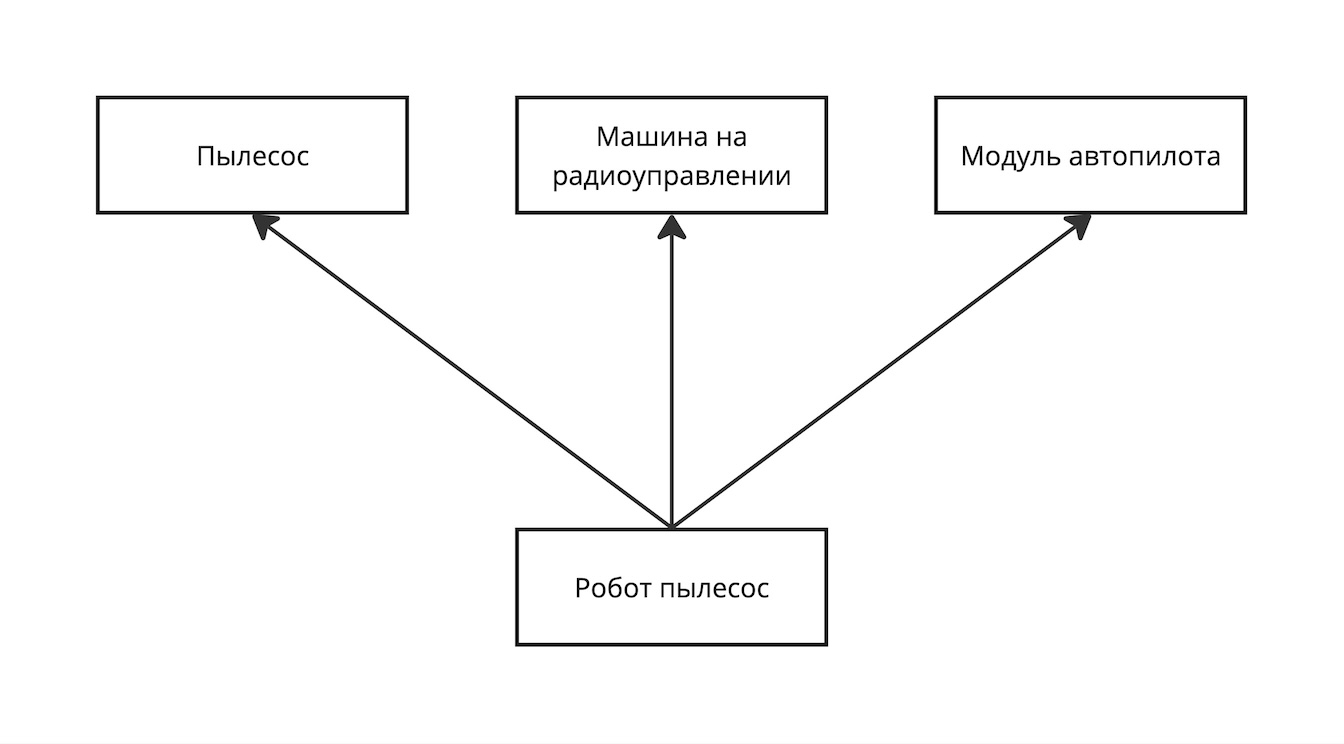

In [42]:
# Базовый класс для пылесоса
class VacuumCleaner:
    def __init__(self) -> None:
        self.dust_collected = 0  # Собранная пыль

    def vacuum(self):
        """Метод для всасывания пыли"""
        self.dust_collected += 1
        print(f"Впитывание пыли... Собрано {self.dust_collected} единиц пыли.")

# Базовый класс для машины на радиоуправлении
class RemoteControlCar:
    def __init__(self) -> None:
        self.position = [0, 0]  # Начальная позиция
        self.direction = "N"  # Направление: N, E, S, W

    def move_forward(self, distance: int) -> None:
        """Метод для движения вперед"""
        if self.direction == "N":
            self.position[1] += distance
        elif self.direction == "E":
            self.position[0] += distance
        elif self.direction == "S":
            self.position[1] -= distance
        elif self.direction == "W":
            self.position[0] -= distance
        print(f"Двигаемся вперед на {distance} единиц. Позиция: {self.position}")

    def move_backward(self, distance: int) -> None:
        """Метод для движения назад"""
        if self.direction == "N":
            self.position[1] -= distance
        elif self.direction == "E":
            self.position[0] -= distance
        elif self.direction == "S":
            self.position[1] += distance
        elif self.direction == "W":
            self.position[0] += distance
        print(f"Двигаемся назад на {distance} единиц. Позиция: {self.position}")

    def turn_left(self) -> None:
        """Поворот налево"""
        directions = ["N", "W", "S", "E"]
        self.direction = directions[(directions.index(self.direction) + 1) % 4]
        print(f"Поворот налево. Теперь направление: {self.direction}")

    def turn_right(self) -> None:
        """Поворот направо"""
        directions = ["N", "E", "S", "W"]
        self.direction = directions[(directions.index(self.direction) + 1) % 4]
        print(f"Поворот направо. Теперь направление: {self.direction}")

# Класс для автономного движения
class AutonomousMovement:
    def __init__(self) -> None:
        self.sensors = {"front": False, "left": False, "right": False}  # Ложь означает, что препятствий нет

    def detect_obstacle(self, direction) -> dict:
        """Метод для распознавания препятствия"""
        return self.sensors[direction]

    def auto_move(self) -> None:
        """Метод для автономного движения"""
        if not self.detect_obstacle("front"):
            print("Препятствий впереди нет, едем вперед.")
            self.move_forward(1)
        else:
            print("Обнаружено препятствие! Пытаемся объехать...")
            if not self.detect_obstacle("left"):
                self.turn_left()
                self.move_forward(1)
            elif not self.detect_obstacle("right"):
                self.turn_right()
                self.move_forward(1)
            else:
                print("Заблокирован со всех сторон. Остановка.")

# Итоговый класс автономного робота для уборки
class AutonomousCleaningRobot(VacuumCleaner, RemoteControlCar, AutonomousMovement):
    def __init__(self) -> None:
        VacuumCleaner.__init__(self)
        RemoteControlCar.__init__(self)
        AutonomousMovement.__init__(self)

    def clean_and_move(self) -> None:
        """Метод для автономной уборки и движения"""
        print("Начинаем уборку...")
        self.vacuum()  # Включаем всасывание
        self.auto_move()  # Автономное движение

# Пример использования
robot = AutonomousCleaningRobot()

# Пылесосим и двигаемся
robot.clean_and_move()

# Изменение состояния датчиков для проверки автономного движения
robot.sensors["front"] = True
robot.clean_and_move()

Начинаем уборку...
Впитывание пыли... Собрано 1 единиц пыли.
Препятствий впереди нет, едем вперед.
Двигаемся вперед на 1 единиц. Позиция: [0, 1]
Начинаем уборку...
Впитывание пыли... Собрано 2 единиц пыли.
Обнаружено препятствие! Пытаемся объехать...
Поворот налево. Теперь направление: W
Двигаемся вперед на 1 единиц. Позиция: [-1, 1]


## ABC

* В питоне нет интерфейсов
* **ABC** позволяет создать контракт, который потом в потомках обязано быть реализовано

In [34]:
from abc import ABC, abstractmethod

class BaseRepo(ABC):
    @abstractmethod
    def get(self, id): ...
    @abstractmethod
    def save(self, obj): ...
    
class MyRepo(BaseRepo):
     def __init__(self):
        self.data = {}
     def get(self, id): 
         return self.data[id]    
     def save(self, obj): 
         self.data[obj.id] = obj
         


In [ ]:
class MyRepo(BaseRepo):
     def __init__(self):
        self.data = {}
     def get(self, id): 
         return self.data[id]    
     
MyRepo()

TypeError: Can't instantiate abstract class MyRepo without an implementation for abstract method 'save'

* Если отнаследоваться и забыть все реализовать, то упадем, класс наследник будет тоже абстрактным.

### protocols

* «питонячий» способ задать интерфейс — через структурную типизацию.
* в типизации можем указать тип протокола, а не указывать конкретный класс, а именно базовый, что не позволительно указать в abc - потому что он абстрактный
* cделали, для улучшения типизации

In [27]:
from typing import Protocol

class JsonSerializable(Protocol):
    def to_json(self) -> str: ...
    
class JsonTrasporter(Protocol):
    def to_transport(self) -> str: ...

class Person:
    def __init__(self, name): self.name = name
    def to_json(self): 
        return f'{{"name": "{self.name}"}}'

def save_as_json(obj: JsonSerializable):
    print(obj.to_json())
    

save_as_json(Person("Alice"))

{"name": "Alice"}


# Pydantic

~~Не ожидали, а все тут теперь английский учим~~

Pydantic - это библиотека Python для разбора и валидации данных, которая использует аннотации типов Python. Она особенно полезна в ситуациях, где важны валидация данных, их преобразование и обеспечение соответствия типам. Хотя Python является динамически типизированным языком, Pydantic предлагает надежный способ убедиться, что данные, с которыми вы работаете, соответствуют определенным ограничениям и форматам.

Использование:

* Разработка API

Pydantic часто используется с FastAPI для стандартизации конечных точек API (увидим дальше)
* Загрузка данных

При работе с внешними источниками данных (например, базами данных, CSV-файлами или сторонними API) Pydantic помогает обеспечить хорошую структурированность входящих данных и их соответствие ожидаемым форматам / обеспечить миграцию структур этих данных (увидим на следующих семинарах).
* Управление конфигурацией

Модели Pydantic идеально подходят для управления настройками и конфигурациями приложений, обеспечивая соблюдение типов и значений по умолчанию. (сейчас посмотрим)

In [28]:
!python3 -m pip install pydantic

In [45]:
from pydantic import BaseModel, ValidationError

class UserModel(BaseModel):
    id: int
    name: str
    email: str

# Valid Input
try:
    user = UserModel(id=1, name='John Doe', email='john@example.com')
    print(user)
except ValidationError as e:
    print(e)

# Invalid Input
try:
    invalid_user = UserModel(id='not_a_number', name='Jane Doe', email='jane@example.com')
except ValidationError as e:
    print(e)

id=1 name='John Doe' email='john@example.com'
1 validation error for UserModel
id
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='not_a_number', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/int_parsing


### enviroment settings via pydantic

* позволяет построить конфиги на основе pydantic
* жоско требует определенный тип
* при малейшем не соблюдении -- падает c ошибкой

In [47]:
!python3.13 -m pip install pydantic_settings

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pydantic_settings]


In [48]:
from pydantic import BaseModel, Field
from pydantic_settings import BaseSettings, SettingsConfigDict
from typing import Any

class AppConfig(BaseSettings):
    name: str = Field(default="MyApp", description="The name of the application")
    debug_mode: bool = Field(default=False, description="Debug mode flag")
    max_connections: int = Field(default=10, description="Maximum number of allowed connections")
    environment: str = Field(default="production", description="Deployment environment")

    # SettingsConfigDict allows configuring how the model behaves
    model_config = SettingsConfigDict(
        env_prefix='APP_',  # Environment variables prefix, e.g., APP_DEBUG_MODE
        extra='forbid',  # Forbid extra fields that are not defined in the model
        case_sensitive=False  # Add this line to make it case-insensitive
    )

In [49]:
# Example: Loading config from environment variables
import os

# Simulate setting environment variables

# incorrect way to setup env vars:
os.environ['NAME'] = 'python'
# correct way to setup env vars:
# os.environ['APP_NAME'] = 'python'

os.environ['APP_DEBUG_MODE'] = 'true'
# try this as well:
# os.environ['APP_DEBUG_MODE'] = '1'


os.environ['APP_MAX_CONNECTIONS'] = '20'

config = AppConfig()

print(config)

name='MyApp' debug_mode=True max_connections=20 environment='production'


Не трудно заметить, что pydantic конвертирует все типы за нас!

In [50]:
config.environment

'production'

Хм... У нас на самом деле есть список окружений.
Для этого лучше использовать Enums!

In [51]:
from enum import Enum # actually in python 3.12 please use StrEnums

class Env(Enum):
    PROD = "production"
    TEST = "test"
    DEV = "dev"

In [52]:
class AppEnvConfig(BaseSettings):
    name: str = Field(default="MyApp", description="The name of the application")
    debug_mode: bool = Field(default=False, description="Debug mode flag")
    max_connections: int = Field(default=10, description="Maximum number of allowed connections")
    environment: Env = Field(default=Env.PROD, description="Deployment environment")

    # SettingsConfigDict allows configuring how the model behaves
    model_config = SettingsConfigDict(
        env_prefix='APP_',  # Environment variables prefix, e.g., APP_DEBUG_MODE
        extra='forbid',  # Forbid extra fields that are not defined in the model
        case_sensitive=False  # Add this line to make it case-insensitive
    )

In [53]:
# Example: Loading config from environment variables
import os

# Simulate setting environment variables
# incorrect way to setup env vars:
os.environ['NAME'] = 'python'
# correct way to setup env vars:
# os.environ['APP_NAME'] = 'python'
os.environ['APP_DEBUG_MODE'] = 'true'
os.environ['APP_MAX_CONNECTIONS'] = '20'

os.environ['APP_ENVIRONMENT'] = 'test'
config = AppEnvConfig()

print(config)

name='MyApp' debug_mode=True max_connections=20 environment=<Env.TEST: 'test'>
